# Implicit ridge regularization provided by the minimum-norm least squares estimator when $n\ll p$

http://arxiv.org/XXX

In [2]:
# Load libraries and set up the notebook

%matplotlib notebook

import numpy as np
import pylab as plt
import seaborn as sns; sns.set()
import matplotlib as mpl

mpl.rcParams.update({'nbagg.transparent': False, 'figure.facecolor': 'white'})
sns.set_style('ticks', {'axes.linewidth': .75, "xtick.major.size":4, "ytick.major.size":4})
sns.set_context('paper')

## `Liver.toxicity` case study

Run `getData.R` in R to get the `.txt` files with data.

X shape: (64, 3116)
Y shape: (64, 10)


<IPython.core.display.Javascript object>


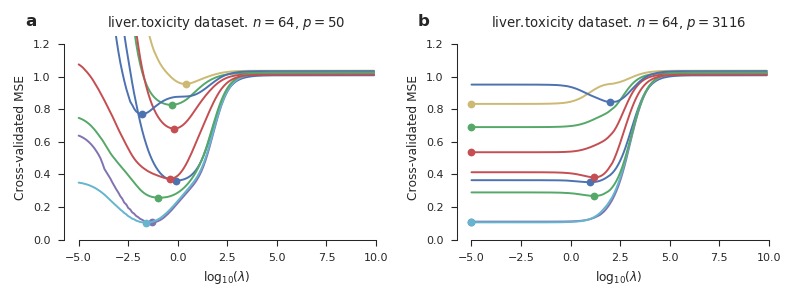

In [3]:
# Using glmnet from https://web.stanford.edu/~hastie/glmnet_python/

import glmnet_python    
from cvglmnet import cvglmnet
from cvglmnetPlot import cvglmnetPlot

X = np.loadtxt('livertoxicity-gene.txt')
Y = np.loadtxt('livertoxicity-clinic.txt')
print('X shape:', X.shape)
print('Y shape:', Y.shape)
X = X[:, np.argsort(np.std(X,axis=0))[::-1]]
X = X - np.mean(X, axis=0)
X = X / np.std(X, axis=0)
Y = Y - np.mean(Y, axis=0)
Y = Y / np.std(Y, axis=0)

lambdau = np.array(10.0**np.arange(-5,10,.1))
ps = [50, X.shape[1]]

plt.figure(figsize=(8,3))

for subplotnum, p in enumerate(ps):
    plt.subplot(1,2,subplotnum+1)
    
    for i in [0,2,3,4,5,6,7,8,9]:
        y = Y[:,i]
        fit = cvglmnet(x = X[:,:p].copy(), y = y.copy(), alpha = 0, 
                       standardize = True, intr = True, lambdau=lambdau)
    
        color = next(plt.gca()._get_lines.prop_cycler)['color']
        plt.plot(np.log10(fit['lambdau']), fit['cvm'], '-', color=color)
        plt.plot(np.log10(fit['lambda_min']), np.min(fit['cvm']), 'o', color=color)

    plt.xlabel('$\log_{10}(\lambda)$')
    plt.ylabel('Cross-validated MSE')
    plt.title('liver.toxicity dataset. $n=64$, $p=' + str(p) + '$')
    plt.ylim([0, 1.25])
    sns.despine(trim=True)

plt.tight_layout()

plt.text(-.12, 1.05, 'a', transform = plt.gcf().get_axes()[0].transAxes, fontsize=12, fontweight='bold')
plt.text(-.12, 1.05, 'b', transform = plt.gcf().get_axes()[1].transAxes, fontsize=12, fontweight='bold')

plt.savefig('figures/livertoxicity.pdf')

In [35]:
# # Manual 10-fold CV to try negative values of lambda

# X = np.loadtxt('livertoxicity-gene.txt')
# Y = np.loadtxt('livertoxicity-clinic.txt')
# print(X.shape)
# print(Y.shape)
# X = X[:, np.argsort(np.std(X,axis=0))[::-1]]
# X = X - np.mean(X, axis=0)
# X = X / np.std(X, axis=0)
# Y = Y - np.mean(Y, axis=0)
# Y = Y / np.std(Y, axis=0)

# def cvridge(X, y, lambdau, nfolds=10):
#     errs = np.zeros((nfolds, lambdau.size))
    
#     n = X.shape[0]
# #     ind = np.random.permutation(n)
# #     X = X[ind,:]
# #     y = y[ind]
        
#     for cvfold in range(nfolds):
#         indtest  = np.arange(cvfold*int(n/nfolds), (cvfold+1)*int(n/nfolds))
#         indtrain = np.setdiff1d(np.arange(n), indtest)
#         Xtrain = np.copy(X[indtrain,:])
#         ytrain = np.copy(y[indtrain])
#         Xtest  = np.copy(X[indtest,:])
#         ytest  = np.copy(y[indtest])
            
#         # centering
#         mu = np.mean(Xtrain, axis=0)
#         Xtrain = Xtrain - mu
#         Xtest  = Xtest  - mu
# #         mu = np.mean(ytrain)
# #         sigma = np.std(ytrain)
# #         ytrain = (ytrain - mu) / sigma
# #         ytest  = (ytest  - mu) / sigma
        
#         U,s,V = np.linalg.svd(Xtrain, full_matrices=False)
#         V = V.T
#         if X.shape[0]<X.shape[1]:
#             U = U[:,:-1]
#             V = V[:,:-1]
#             s = s[:-1]
        
#         for i,l in enumerate(lambdau):
#             beta = V @ np.diag(s/(s**2 + l)) @ U.T @ ytrain
#             e = ytest - Xtest @ beta
#             errs[cvfold, i] = np.sum(e**2)
    
#     return np.sum(errs, axis=0) / y.size

# plt.figure(figsize=(8,3))
# lambdau = np.array(10.0**np.arange(-5,10,.1))
# lambdau = np.arange(-250,50,10)
# ps = [50, X.shape[1]]

# for subplotnum, p in enumerate(ps):
#     plt.subplot(1,2,subplotnum+1)
    
#     for i in [0,2,3,4,5,6,7,8,9]:
#         y = Y[:,i]
#         err = cvridge(X[:,:p], y, lambdau, nfolds=8)    
#         color = next(plt.gca()._get_lines.prop_cycler)['color']
# #         plt.plot(np.log10(lambdau), err, '-', color=color)
# #         plt.plot(np.log10(lambdau[np.argmin(err)]), np.min(err), 'o', color=color)
#         plt.plot(lambdau, err, '.-', color=color)
#         plt.plot(lambdau[np.argmin(err)], np.min(err), 'o', color=color)

#     plt.xlabel('log10(lambda)')
#     plt.ylabel('Cross-validated MSE')
#     plt.title('liver.toxicity dataset. n=64, p=' + str(p))
#     plt.ylim([0, 1.25])
#     sns.despine(trim=True)

# plt.tight_layout()

## Toy model

<IPython.core.display.Javascript object>


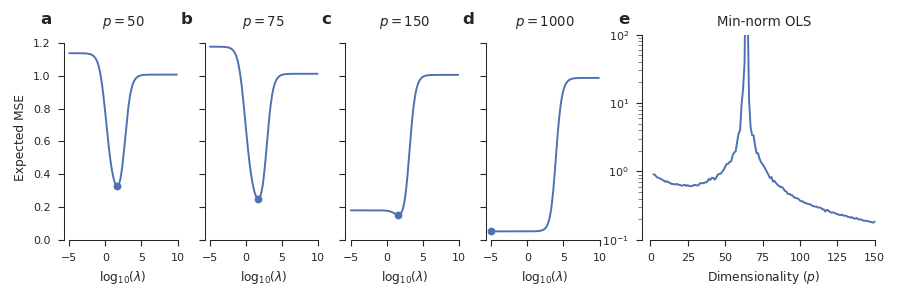

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
.....................................................................................................................................................


In [4]:
# Toy model: ridge regularization for different p

ntest = 10000
ps = np.array([50, 75, 150, 1000])
n = 64
rho = 0.25
nrep = 100

lambdau = np.array(10.0**np.arange(-5,10,.1))
np.random.seed(42)

plt.figure(figsize=(9,3))

for subplotnum, p in enumerate(ps):
    ytest = np.random.randn(ntest,1)
    Xtest = np.random.randn(ntest,p)
    Xtest = Xtest*np.sqrt(1-rho**2) + ytest*rho

    mse = np.zeros((nrep, lambdau.size))
    for r in range(nrep):
        print('.', end='')

        ytrain = np.random.randn(n,1)
        Xtrain = np.random.randn(n,p)
        Xtrain = Xtrain*np.sqrt(1-rho**2) + ytrain*rho
        [U,s,V] = np.linalg.svd(Xtrain, full_matrices = False)
        V = V.T
    
        for i,l in enumerate(lambdau):
            beta = V @ np.diag(s/(s**2 + l)) @ U.T @ ytrain
            e = ytest - Xtest @ beta
            mse[r, i] = np.mean(e**2)
    print('')
    
    mse = np.mean(mse, axis=0)
    
    plt.subplot(1, 6, subplotnum+1)
    color = next(plt.gca()._get_lines.prop_cycler)['color']
    plt.plot(np.log10(lambdau), mse, color=color)
    plt.plot(np.log10(lambdau[np.argmin(mse)]), np.min(mse), 'o', color=color)
    plt.title('$p=' + str(p) + '$')
    if subplotnum==0:
        plt.ylabel('Expected MSE')
    else:
        plt.gca().axes.yaxis.set_ticklabels([])
    plt.xlabel('$\log_{10}(\lambda)$')
    plt.ylim([0, 1.25])
    plt.xticks([-5,0,5,10])
    sns.despine(trim=True)

plt.tight_layout()


# Performance of the minimum-norm OLS in the model depending on p

ps = np.arange(2,151)

np.random.seed(42)

mse = np.zeros((nrep, ps.size))
for i, p in enumerate(ps):
    print('.', end='')

    ytest = np.random.randn(ntest,1)
    Xtest = np.random.randn(ntest,p)
    Xtest = Xtest*np.sqrt(1-rho**2) + ytest*rho

    for r in range(nrep):
        ytrain = np.random.randn(n,1)
        Xtrain = np.random.randn(n,p)
        Xtrain = Xtrain*np.sqrt(1-rho**2) + ytrain*rho
        [U,s,V] = np.linalg.svd(Xtrain, full_matrices = False)
        V = V.T
        beta = V @ np.diag(1/s) @ U.T @ ytrain
        e = ytest - Xtest @ beta
        mse[r, i] = np.mean(e**2)
print('')
    
mse = np.mean(mse, axis=0)

plt.subplot(1, 3, 3)

plt.plot(ps, mse)
plt.xlabel('Dimensionality ($p$)')
plt.yscale('log')
plt.title('Min-norm OLS')
plt.ylim([0.1, 100])
sns.despine(trim=True)

plt.text(-.2, 1.05, 'a', transform = plt.gcf().get_axes()[0].transAxes, fontsize=12, fontweight='bold')
plt.text(-.2, 1.05, 'b', transform = plt.gcf().get_axes()[1].transAxes, fontsize=12, fontweight='bold')
plt.text(-.2, 1.05, 'c', transform = plt.gcf().get_axes()[2].transAxes, fontsize=12, fontweight='bold')
plt.text(-.2, 1.05, 'd', transform = plt.gcf().get_axes()[3].transAxes, fontsize=12, fontweight='bold')
plt.text(-.1, 1.05, 'e', transform = plt.gcf().get_axes()[4].transAxes, fontsize=12, fontweight='bold')

plt.savefig('figures/model.pdf')

## Augmenting the toy model with random predictors

<IPython.core.display.Javascript object>


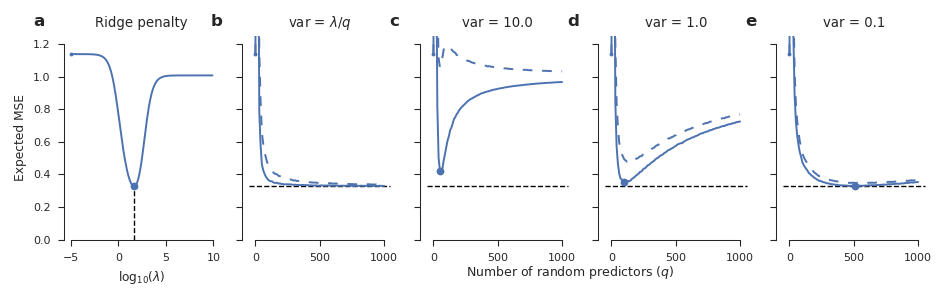

Optimal lambda: 39.8107170553
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................


In [11]:
# Augmenting the toy model with random preductors

ntest = 10000
p = 50
fakevar = np.array([np.nan, 10, 1, .1])     # NaN means adaptive variance = lambda/p
n = 64
rho = 0.25
nrep = 100

fakenum = np.arange(0,1001,10)
lambdau = np.array(10.0**np.arange(-5,10,.1))
np.random.seed(42)

# common test set
ytest = np.random.randn(ntest,1)
Xtest = np.random.randn(ntest,p)
Xtest = Xtest*np.sqrt(1-rho**2) + ytest*rho

# generating training sets here so that all subplots could use the same ones
trainingSets = []
for r in range(nrep):
    ytrain = np.random.randn(n,1)
    Xtrain = np.random.randn(n,p)
    Xtrain = Xtrain*np.sqrt(1-rho**2) + ytrain*rho
    trainingSets.append((Xtrain, ytrain))
    
# random predictors for the test set
XfakeTest = np.random.randn(ntest, np.max(fakenum))

plt.figure(figsize=(9.5,3))

# The first subplot is ridge

mse = np.zeros((nrep, lambdau.size))
for r in range(nrep):
    (Xtrain, ytrain) = trainingSets[r]
    [U,s,V] = np.linalg.svd(Xtrain, full_matrices = False)
    V = V.T
    
    for i,l in enumerate(lambdau):
        beta = V @ np.diag(s/(s**2 + l)) @ U.T @ ytrain
        e = ytest - Xtest @ beta
        mse[r, i] = np.mean(e**2)

mse = np.mean(mse, axis=0)
  
plt.subplot(1, fakevar.size+1, 1)
color = next(plt.gca()._get_lines.prop_cycler)['color']
plt.plot(np.log10(lambdau), mse, color=color)
plt.plot(np.log10(lambdau[np.argmin(mse)]) * np.array([1,1]), [0,np.min(mse)], 'k--', linewidth=1)
plt.plot(np.log10(lambdau[np.argmin(mse)]), np.min(mse), 'o', color=color)
plt.plot(np.log10(lambdau[0]), mse[0], '.', color=color)
plt.title('Ridge penalty')
plt.ylabel('Expected MSE')
plt.xlabel('$\log_{10}(\lambda)$')
plt.ylim([0, 1.25])
plt.xticks([-5,0,5,10])
sns.despine(trim=True)

ridgebest = np.min(mse)
bestlambda = lambdau[np.argmin(mse)]
print('Optimal lambda:', bestlambda)

# The following subplots are adding random predictors

for subplotnum, sigma2 in enumerate(fakevar):

    mse = np.zeros((nrep, fakenum.size))
    mse_nontrunc = np.zeros((nrep, fakenum.size))

    for r in range(nrep):
        print('.', end='')
        (Xtrain, ytrain) = trainingSets[r]
        
        for i,pfake in enumerate(fakenum):
            if np.isnan(sigma2):
                fakestd = np.sqrt(bestlambda / np.maximum(pfake,1))  # avoiding division by 0
            else:
                fakestd = np.sqrt(sigma2)
                
            Xfake = np.random.randn(n, pfake) * fakestd
            [U,s,V] = np.linalg.svd(np.concatenate((Xtrain,Xfake), axis=1), full_matrices = False)
            V = V.T   
            beta = V @ np.diag(s**(-1)) @ U.T @ ytrain
            
            e = ytest - np.concatenate((Xtest, XfakeTest[:,:pfake]*fakestd), axis=1) @ beta
            mse_nontrunc[r, i] = np.mean(e**2)
            
            e = ytest - Xtest @ beta[:p]
            mse[r, i] = np.mean(e**2)
    print('')
    
    mse = np.mean(mse, axis=0)
    mse_nontrunc = np.mean(mse_nontrunc, axis=0)
    
    plt.subplot(1, fakevar.size+1, subplotnum+2)
    color = next(plt.gca()._get_lines.prop_cycler)['color']
    plt.plot(fakenum, mse_nontrunc, '--', color=color, dashes=(5, 5))
    plt.plot(plt.xlim(), [ridgebest,ridgebest], 'k--', linewidth=1)
    plt.plot(fakenum, mse, color=color)
    if ~np.isnan(sigma2):
        plt.plot(fakenum[np.argmin(mse)], np.min(mse), 'o', color=color)
    plt.plot(np.log10(lambdau[0]), mse[0], '.', color=color)
    if np.isnan(sigma2):
        plt.title('var = $\lambda/q$')
    else:
        plt.title('var = ' + str(sigma2))
    plt.ylim([0, 1.25])
    plt.gca().axes.yaxis.set_ticklabels([])
    sns.despine(trim=True)

plt.gcf().text(0.6, 0.08, 'Number of random predictors ($q$)', ha='center', fontsize=9)
plt.tight_layout()

plt.text(-.2, 1.05, 'a', transform = plt.gcf().get_axes()[0].transAxes, fontsize=12, fontweight='bold')
plt.text(-.2, 1.05, 'b', transform = plt.gcf().get_axes()[1].transAxes, fontsize=12, fontweight='bold')
plt.text(-.2, 1.05, 'c', transform = plt.gcf().get_axes()[2].transAxes, fontsize=12, fontweight='bold')
plt.text(-.2, 1.05, 'd', transform = plt.gcf().get_axes()[3].transAxes, fontsize=12, fontweight='bold')
plt.text(-.2, 1.05, 'e', transform = plt.gcf().get_axes()[4].transAxes, fontsize=12, fontweight='bold')

plt.savefig('figures/fakepredictors.pdf')

## Negative ridge

<IPython.core.display.Javascript object>


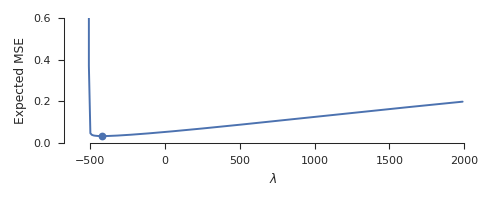

....................
Minimal eigenvalue: 527.186104522


In [8]:
# Negative ridge

ntest = 10000
p = 1000
ptrue = 1000
n = 64
rho = 0.25
nrep = 20

lambdau = np.arange(-550,2000,10)
np.random.seed(42)

plt.figure(figsize=(5,2))

ytest = np.random.randn(ntest,1)
Xtest = np.random.randn(ntest,p)
Xtest[:,:ptrue] = Xtest[:,:ptrue]*np.sqrt(1-rho**2) + ytest*rho

mse = np.zeros((nrep, lambdau.size))
for r in range(nrep):
    print('.', end='')
    
    ytrain = np.random.randn(n,1)
    Xtrain = np.random.randn(n,p)
    Xtrain[:,:ptrue] = Xtrain[:,:ptrue]*np.sqrt(1-rho**2) + ytrain*rho
    [U,s,V] = np.linalg.svd(Xtrain, full_matrices = False)
    V = V.T
    
    for i,l in enumerate(lambdau):
        beta = V @ np.diag(s/(s**2 + l)) @ U.T @ ytrain
        e = ytest - Xtest @ beta
        mse[r, i] = np.mean(e**2)
print('')

mse = np.mean(mse, axis=0)
    
color = next(plt.gca()._get_lines.prop_cycler)['color']
plt.plot(lambdau, mse, color=color)
plt.plot(lambdau[np.argmin(mse)], np.min(mse), 'o', color=color)
plt.ylabel('Expected MSE')
plt.xlabel('$\lambda$')
plt.ylim([0, .6])
plt.yticks([0, .2, .4, .6])
sns.despine(trim=True)

print('Minimal eigenvalue:', s[-1]**2)

plt.tight_layout()
plt.savefig('figures/negative-shrinkage.pdf')